In [1]:
from FeatureExtractor import get_data
from plotutils import model_history,c_report,plot_confusion_matrix
import numpy as np
from tensorflow import keras
import sklearn
from keras.models import  Model
from keras.layers import *
from keras.regularizers import *
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from keras.callbacks import *
import numpy as np
import pandas as pd

In [2]:
# read data and call get_data function to get splits of data
emodb_data = pd.read_csv('Downloads/Emodb_dataset.csv')

In [3]:
emodb_data

,uuid,speaker,sentence,letter,labels,suffix,path,paths
0,03a01Fa,3,a01,F,happy,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
1,03a01Nc,3,a01,N,neutral,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
2,03a01Wa,3,a01,W,angry,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
3,03a02Fc,3,a02,F,happy,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
4,03a02Nc,3,a02,N,neutral,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
...,...,...,...,...,...,...,...,...
530,16b10Lb,16,b10,L,boring,b,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
531,16b10Tb,16,b10,T,sad,b,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
532,16b10Td,16,b10,T,sad,d,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
533,16b10Wa,16,b10,W,angry,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...


In [4]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
z=label.fit_transform(emodb_data['labels'])
z

array([4, 5, 1, 4, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 0, 4, 5, 6, 1, 1, 4, 4,
       2, 5, 1, 4, 2, 5, 6, 1, 1, 0, 2, 5, 6, 1, 5, 6, 1, 2, 5, 6, 1, 0,
       3, 5, 5, 1, 1, 0, 4, 2, 5, 1, 1, 0, 0, 4, 2, 5, 6, 1, 4, 2, 5, 6,
       1, 4, 2, 5, 6, 1, 4, 2, 5, 6, 6, 1, 0, 4, 4, 2, 5, 1, 4, 2, 5, 6,
       1, 4, 2, 5, 6, 1, 0, 4, 2, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 3, 4, 5,
       1, 3, 3, 2, 1, 4, 2, 5, 1, 3, 2, 5, 6, 1, 1, 3, 5, 6, 1, 1, 3, 5,
       1, 5, 6, 1, 1, 3, 4, 4, 2, 5, 6, 1, 3, 5, 1, 0, 5, 1, 0, 5, 1, 0,
       4, 2, 5, 1, 4, 5, 1, 1, 0, 2, 6, 1, 0, 0, 2, 6, 1, 0, 3, 4, 2, 0,
       2, 5, 1, 2, 6, 1, 0, 2, 1, 4, 2, 1, 0, 0, 2, 5, 1, 3, 4, 2, 5, 6,
       1, 0, 4, 5, 1, 0, 4, 4, 2, 5, 6, 1, 0, 2, 6, 1, 0, 3, 4, 2, 5, 1,
       0, 4, 5, 6, 1, 4, 2, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 0, 0, 2, 5, 6,
       1, 4, 2, 5, 1, 0, 3, 5, 1, 1, 1, 0, 2, 5, 6, 1, 0, 2, 1, 6, 1, 0,
       3, 4, 5, 1, 1, 1, 2, 6, 0, 6, 1, 0, 2, 1, 0, 3, 3, 4, 2, 5, 1, 0,
       3, 4, 2, 5, 6, 1, 0, 4, 2, 6, 1, 0, 3, 2, 5,

In [5]:
emodb_data['labels']=z
emodb_data


,uuid,speaker,sentence,letter,labels,suffix,path,paths
0,03a01Fa,3,a01,F,4,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
1,03a01Nc,3,a01,N,5,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
2,03a01Wa,3,a01,W,1,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
3,03a02Fc,3,a02,F,4,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
4,03a02Nc,3,a02,N,5,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
...,...,...,...,...,...,...,...,...
530,16b10Lb,16,b10,L,2,b,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
531,16b10Tb,16,b10,T,6,b,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
532,16b10Td,16,b10,T,6,d,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
533,16b10Wa,16,b10,W,1,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...


In [6]:
# for 4 classes do some changes in feature extarctor file
X_train, Y_train, X_test, Y_test = get_data()
Y_train = keras.utils.to_categorical(Y_train,7)
Y_test = keras.utils.to_categorical(Y_test,7)
Y=np.array(emodb_data.labels)
from sklearn.utils.class_weight import compute_class_weight
weight = compute_class_weight(class_weight='balanced', classes=np.unique(Y), y=Y)
weight = {i : weight[i] for i in range(4)}

In [11]:
X_train.shape

(290, 128, 274)

In [7]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
epochs = 150
input1 = Input(shape=(X_train.shape[1], X_train.shape[2], 1))
# First Conv2D block
conv1 = Conv2D(100, kernel_size=(3, 3),strides=(2, 2),activation=None,padding='same',
               kernel_initializer='he_normal', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(input1)
batch1 = BatchNormalization()(conv1)
elu1 = ELU(alpha=1.0)(batch1)
pool1 = MaxPooling2D(pool_size=(2, 2),strides=(1,1))(elu1)
dropout1 = Dropout(0.5)(pool1)

# Second Conv2D block
conv2 = Conv2D(100, kernel_size=(3, 3),strides=(2, 2),padding='same',
               activation=None,kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001) )(dropout1)
batch2 = BatchNormalization()(conv2)
elu2 = ELU(alpha=1.0)(batch2)
pool2 = MaxPooling2D(pool_size=(2,2),strides=(1,1))(elu2)
dropout2 = Dropout(0.5)(pool2)

conv3 = Conv2D(100, kernel_size=(3, 3),strides=(2, 2),activation=None,padding='same',
               kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(dropout2)
batch3 = BatchNormalization()(conv3)
elu3 = ELU(alpha=1.0)(batch3)
pool3 = MaxPooling2D(pool_size=(2, 2),strides=(1,1))(elu3)
dropout3 = Dropout(0.5)(pool3)

conv4 = Conv2D(100, kernel_size=(3, 3),strides=(2, 2),activation=None,padding='same',
                kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(dropout3)
batch4 = BatchNormalization()(conv4)
elu4 = ELU(alpha=1.0)(batch4)
pool4 = MaxPooling2D(pool_size=(2, 2),strides=(1,1))(elu4)
dropout4 = Dropout(0.5)(pool4)
flat1=Flatten()(dropout4)
den1 = Dense(64, activation='relu',kernel_regularizer=l2(0.0001))(flat1)
den2 = Dense(7, activation='softmax')(den1)

In [9]:
model= Model(inputs=input1,outputs=den2)

# Early stopping callback tracking val_loss
stop_early = EarlyStopping(monitor='val_loss', mode='min',
                           verbose=1, patience=150)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 274, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 64, 137, 100)      1000      
                                                                 
 batch_normalization (BatchN  (None, 64, 137, 100)     400       
 ormalization)                                                   
                                                                 
 elu (ELU)                   (None, 64, 137, 100)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 136, 100)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 136, 100)      0     

In [20]:
# Model Checkpoint callback tracking val_accuracy
checkpoint = ModelCheckpoint(
    'model1.h5', 
    monitor = 'val_accuracy', 
    verbose = 1, 
    save_best_only = True
)

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model

In [22]:
history = model.fit(X_train, Y_train, validation_split=0.15, class_weight = weight, batch_size=32,epochs = epochs,callbacks=[checkpoint,stop_early])

Epoch 1/150
8/8 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.8008
Epoch 1: val_accuracy improved from -inf to 0.36364, saving model to model1.h5
8/8 [==============================] - 26s 3s/step - loss: 0.6815 - accuracy: 0.8008 - val_loss: 5.1056 - val_accuracy: 0.3636
Epoch 2/150
8/8 [==============================] - ETA: 0s - loss: 0.8583 - accuracy: 0.7846
Epoch 2: val_accuracy did not improve from 0.36364
8/8 [==============================] - 20s 2s/step - loss: 0.8583 - accuracy: 0.7846 - val_loss: 7.5466 - val_accuracy: 0.2500
Epoch 3/150
8/8 [==============================] - ETA: 0s - loss: 0.3520 - accuracy: 0.8902
Epoch 3: val_accuracy did not improve from 0.36364
8/8 [==============================] - 18s 2s/step - loss: 0.3520 - accuracy: 0.8902 - val_loss: 6.6057 - val_accuracy: 0.2727
Epoch 4/150
8/8 [==============================] - ETA: 0s - loss: 0.3042 - accuracy: 0.9065
Epoch 4: val_accuracy did not improve from 0.36364
8/8 [==========

In [23]:
predict = model.predict(X_test)
loss, accu = model.evaluate(X_test,Y_test,verbose=1)
labels_pred = np.argmax(predict, axis = -1)    
labels_true = np.argmax(Y_test, axis = -1)

2/2 [==============================] - 0s 16ms/step - loss: 1.4730 - accuracy: 0.8788


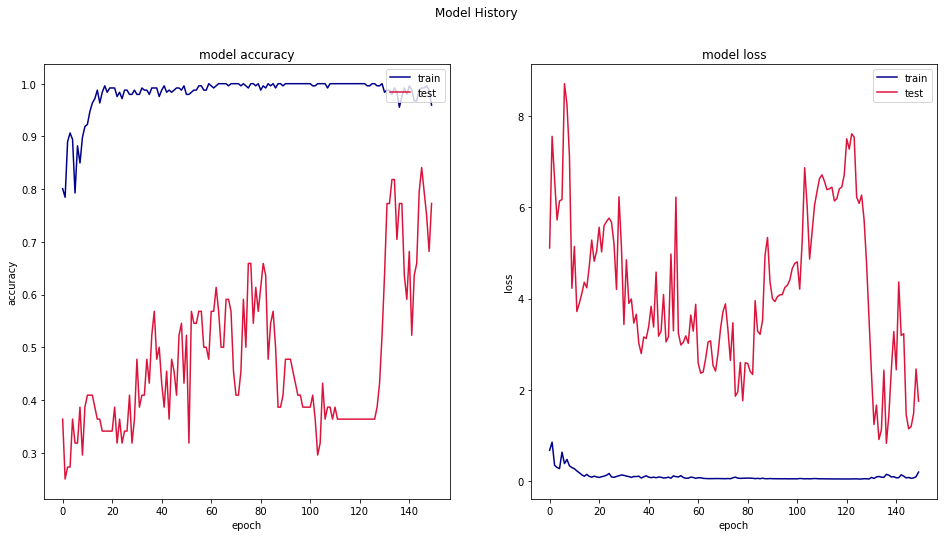

In [24]:
model_history(history)

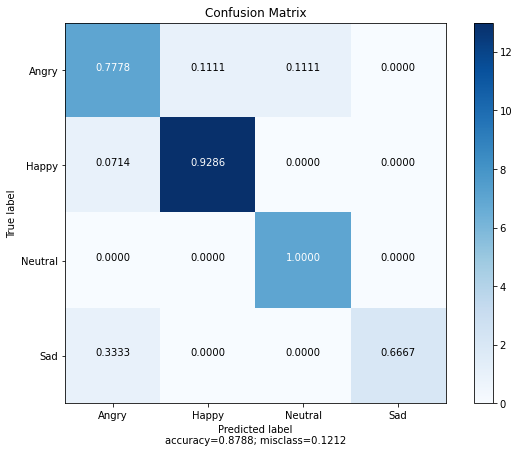

In [25]:
plot_confusion_matrix(cm = confusion_matrix(labels_true, labels_pred),normalize = True,
                    target_names = ['Angry','Happy', 'Neutral', 'Sad'],title = "Confusion Matrix")
